In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

trainPath = "C:\\Users\\ronit\\Programming\\AI\\kaggle_data\\ASL\\asl_alphabet_train"

bs = 32
size = 128
trainDG = ImageDataGenerator(rescale = 1./255,
                             rotation_range=45,
                             width_shift_range=0.3,
                             height_shift_range=0.3,
                             shear_range=0.2,
                             zoom_range=0.3,
                             horizontal_flip=True
                             )

trainG = trainDG.flow_from_directory(trainPath,
                                     target_size = (size, size),
                                     class_mode = 'categorical',
                                     batch_size = bs,
                                     shuffle = True
                                     )

valPath = "C:\\Users\\ronit\\Programming\\AI\\kaggle_data\\ASL\\asl_alphabet_validation"

valDG = ImageDataGenerator(rescale = 1./255,
                           rotation_range = 45,
                           width_shift_range=0.3,
                           height_shift_range=0.3,
                           shear_range = 0.2,
                           zoom_range = 0.3,
                           horizontal_flip = True
                           )
valG = valDG.flow_from_directory(valPath,
                                 target_size = (size, size),
                                 class_mode = 'categorical',
                                 batch_size = bs,
                                 shuffle = True)


Found 69239 images belonging to 29 classes.
Found 17761 images belonging to 29 classes.


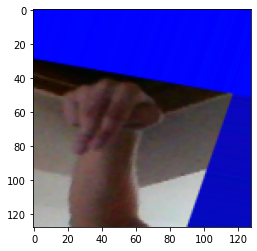

In [2]:
import matplotlib.pyplot as plt
imgs, labels = next(valG)
#labels[:10]
plt.imshow(imgs[0])
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape = (size, size, 3), data_format = "channels_last"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       2

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from datetime import datetime

estop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=20)

log_dir = 'C:\\Users\\ronit\\Programming\\AI\\kaggle_ml\\tensorboard'
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M"+'_(aslModel)')
log_dir = log_dir + '\\' + timestamp

# tboard = TensorBoard(log_dir=log_dir, 
#                     histogram_freq=1,
#                     write_graph=True,
#                     write_images=True,
#                     update_freq='epoch',
#                     profile_batch=2,
#                     embeddings_freq=1)

cpoint = ModelCheckpoint(filepath = 'C:\\Users\\ronit\\Programming\\AI\\kaggle_ml\\aslModel_{val_accuracy: .3f}val_acc.h5', 
                         save_best_only = True, 
                         save_weights_only = False, 
                         monitor = 'val_accuracy',
                         mode = 'max')

In [ ]:
history = model.fit(trainG, 
                    epochs=400, 
                    steps_per_epoch=2160, 
                    validation_data = valG, 
                    verbose = 1, 
                    validation_steps=551,
                    callbacks = [estop, cpoint])

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

NameError: name 'history' is not defined